In [1]:
# from pyGSI.diags import Conventional
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from plots import base_plots, wind_base_plots

In [2]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Filter dataframe returned by PyGSI

One big question with this is to use PyGSI or just to borrow some of the code and have with package not rely on PyGSI at all?

## Read diag files

In [3]:
#temperature diag files
diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

#wind diag files
diag_uv_ges_fp = '../example_data/diag_conv_uv_ges.2024031812.nc4'
diag_uv_anl_fp = '../example_data/diag_conv_uv_anl.2024031812.nc4'

In [4]:
diag_ges = Conventional(diag_uv_ges_fp)
diag_anl = Conventional(diag_uv_anl_fp)

## Query data

In [5]:
df_ges = diag_ges.get_data()
df_anl = diag_anl.get_data()

In [6]:
df_anl

,station_id,observation_class,observation_type,observation_subtype,latitude,longitude,station_elevation,pressure,height,time,prep_qc_mark,setup_qc_mark,nonlinear_qc_var_jb,prep_use_flag,analysis_use_flag,nonlinear_qc_rel_wgt,errinv_input,errinv_adjust,errinv_final,wind_reduction_factor_at_10m,u_observation,u_omf_adjusted,u_omf_unadjusted,v_observation,v_omf_adjusted,v_omf_unadjusted,dominant_sfc_type,model_terrain,u_hofx_unadjusted,u_hofx_adjusted,v_hofx_unadjusted,v_hofx_adjusted
0,IR272,uv,245,0,5.685080,202.797836,110092.0,894.200012,68.0,-1.00000,2.0,1.000000e+09,0.0,0.0,1.0,4.0,0.526316,0.526316,5.263158e-01,1.0,-8.950697,-1.464624,-1.464624,0.940756,2.020810,2.020810,0.0,0.0,-7.486073,-7.486073,-1.080054,-1.080054
1,IR272,uv,245,0,6.128040,202.857498,110059.0,900.799988,59.0,-1.00000,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,2.938736e-39,1.0,-9.521784,-2.333984,-2.333984,1.850847,3.969705,3.969705,0.0,0.0,-7.187799,-7.187799,-2.118857,-2.118857
2,IR272,uv,245,0,6.071170,203.080261,110052.0,930.799988,56.0,-1.00000,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,2.938736e-39,1.0,-8.705514,-1.873541,-1.873541,1.850414,5.598646,5.598646,0.0,0.0,-6.831973,-6.831973,-3.748232,-3.748232
3,IR272,uv,245,0,6.347840,203.166962,110077.0,827.799988,69.0,-1.00000,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,5.263158e-01,1.0,-6.066584,-0.464204,-0.464204,-0.637624,-1.757761,-1.757761,0.0,0.0,-5.602379,-5.602379,1.120137,1.120137
4,IR272,uv,245,0,6.107880,203.118515,110057.0,933.700012,49.0,-1.00000,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,2.938736e-39,1.0,-4.885854,1.953704,1.953704,2.935717,6.706806,6.706806,0.0,0.0,-6.839558,-6.839558,-3.771089,-3.771089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130421,C3583,uv,288,0,43.470501,356.220490,14.0,1017.064636,24.0,-0.03333,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000,1.000000,2.938736e-39,1.0,-3.700000,-5.811331,-5.811331,-2.600000,3.054633,3.054633,0.0,0.0,2.111331,2.111331,-5.654633,-5.654633
130422,D9120,uv,288,0,43.477329,352.668671,50.0,1017.361877,60.0,-0.25000,2.0,1.000000e+09,0.0,115.0,0.0,4.0,1.000000,1.000000,8.000000e-01,1.0,0.000000,-1.298574,-1.298574,0.000000,1.891883,1.891883,0.0,0.0,1.298574,1.298574,-1.891883,-1.891883
130423,AS353,uv,288,0,43.537998,354.376160,17.0,1017.065002,27.0,-0.25000,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000,1.000000,9.216590e-01,1.0,-1.800000,-0.240677,-0.240677,-2.000000,0.305622,0.305622,0.0,0.0,-1.559323,-1.559323,-2.305622,-2.305622
130424,AS353,uv,288,0,43.537998,354.376160,17.0,1017.065002,27.0,-0.08333,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000,1.000000,9.216590e-01,1.0,-2.100000,-0.540677,-0.540677,-2.300000,0.005622,0.005622,0.0,0.0,-1.559323,-1.559323,-2.305622,-2.305622


In [7]:
# for col in df_anl.columns:
#     # Check if all elements in the column are equal between _anl and _ges
#     if not (df_anl[col] == df_ges[col]).all():
#         print(f"Column '{col}' is different.")

## Testing PyGSI filter_obs function

### Set filter arguments

In [8]:
hem = "CONUS"

obs_types = [120]
elv_range = (0,20)

# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (360-109, 360-102) #to convert from deg west to deg east

In [9]:
df_anl_fil = filter_df(df_anl, lat_range=co_lats, lon_range=co_lons)
df_ges_fil = filter_df(df_ges, lat_range=co_lats, lon_range=co_lons)
print(len(df_anl_fil))
print(len(df_ges_fil))

2171
2171


## Testing base plots

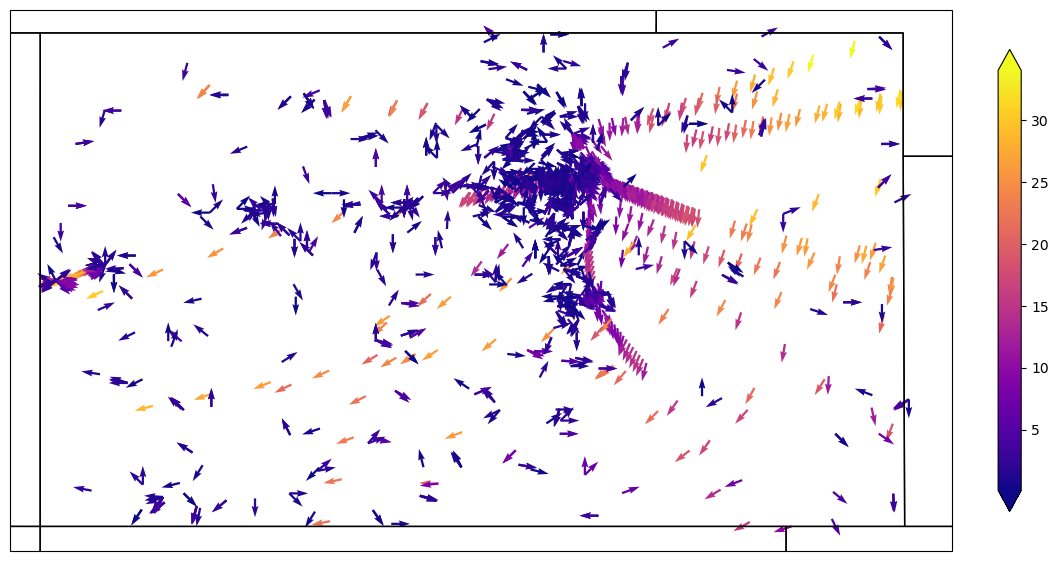

In [10]:
# base_plots(df_anl_fil, df_ges_fil)
wind_base_plots(df_anl_fil, df_ges_fil)